In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11291 entries, 1980-03-17 to 2024-12-27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 705.7+ KB
None

Dataset Summary:
          Adj Close         Close          High           Low          Open  \
count  11291.000000  11291.000000  11291.000000  11291.000000  11291.000000   
mean      63.586275     72.057776     72.478879     71.646418     67.955424   
std       52.272225     51.295776     51.552662     50.976716     55.851523   
min        2.259452      3.237711      3.237711      3.237711      0.000000   
25%       19.224636

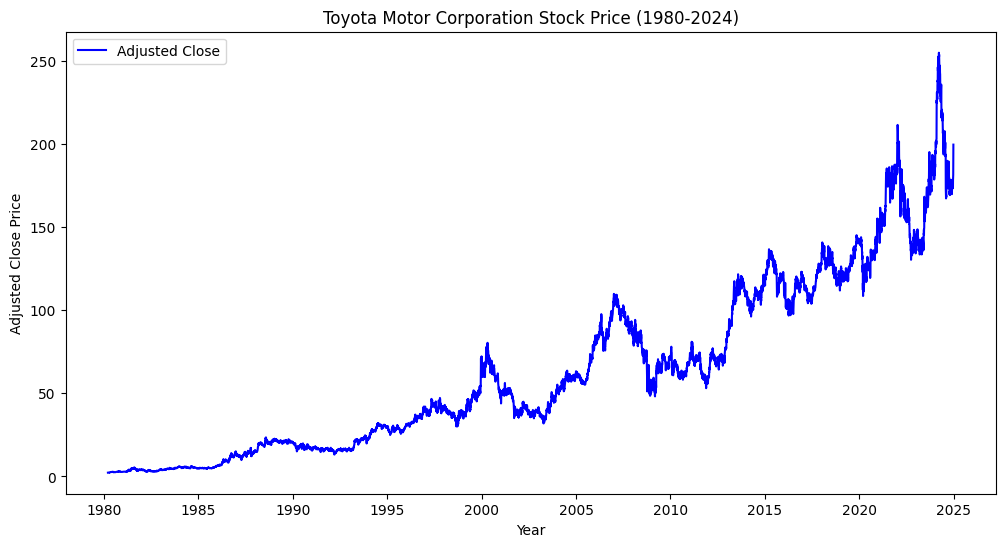

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "/kaggle/input/toyota-motors-stock-data-2980-2024/Toyota_Data.csv"  # Update this with your file path
df = pd.read_csv(file_path)

# Convert date column to datetime if not already done
df['date'] = pd.to_datetime(df['Date'])

# Ensure data is sorted by date
df = df.sort_values(by='date')

# Set date as the index for easier time series analysis
df.set_index('date', inplace=True)

# Display basic dataset information
print("Dataset Info:")
print(df.info())

print("\nDataset Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# ---- Exploratory Data Analysis ---- #

# Plot the adjusted close prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label="Adjusted Close", color='blue')
plt.title("Toyota Motor Corporation Stock Price (1980-2024)")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()



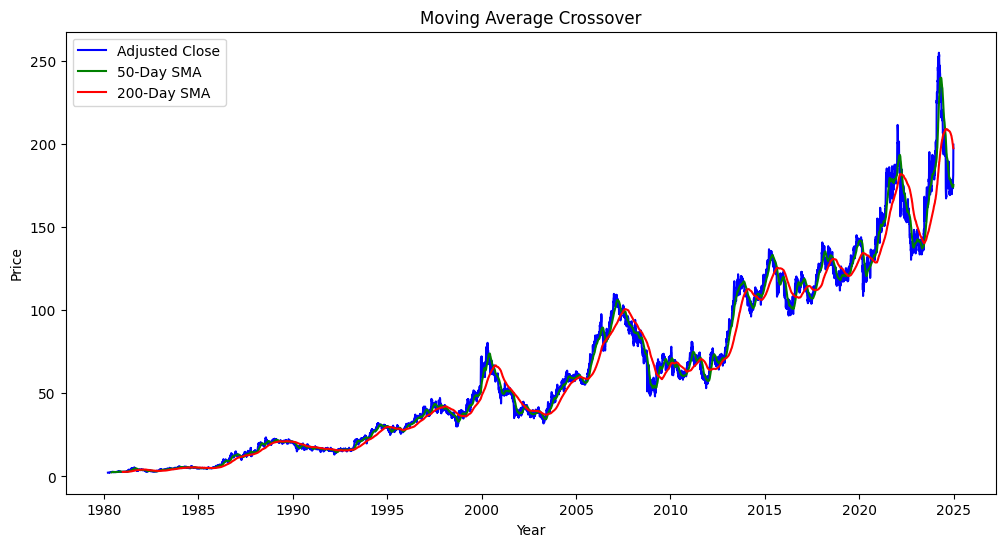

In [13]:
# ---- Moving Average Crossover Strategy ---- #

# Calculate moving averages
df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()  # Short-term moving average
df['SMA_200'] = df['Adj Close'].rolling(window=200).mean()  # Long-term moving average

# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label="Adjusted Close", color='blue')
plt.plot(df.index, df['SMA_50'], label="50-Day SMA", color='green')
plt.plot(df.index, df['SMA_200'], label="200-Day SMA", color='red')
plt.title("Moving Average Crossover")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

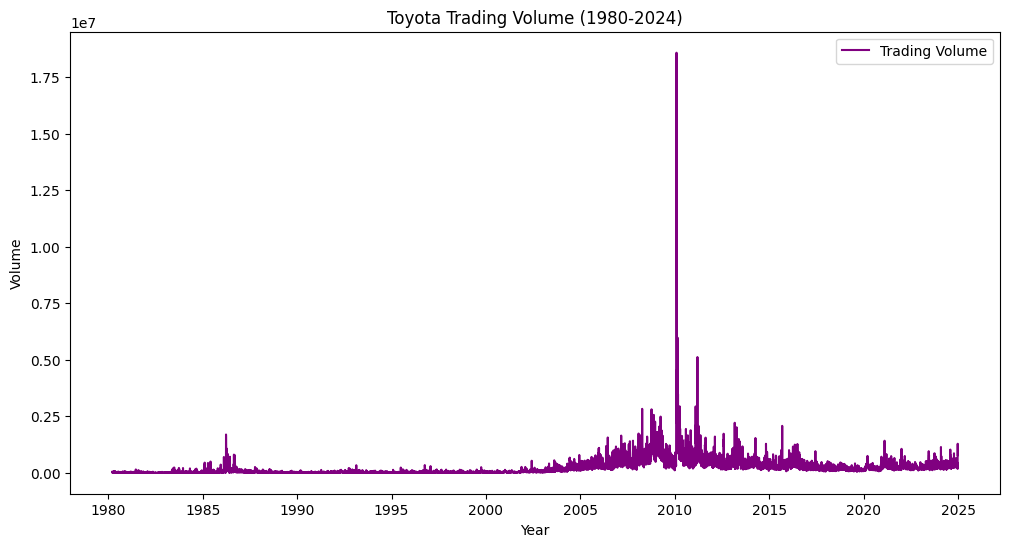

In [14]:
# ---- Volume Analysis ---- #

# Plot trading volume trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label="Trading Volume", color='purple')
plt.title("Toyota Trading Volume (1980-2024)")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend()
plt.show()

In [15]:
# Analyze periods of high trading volume
high_volume_threshold = df['Volume'].quantile(0.95)
high_volume_periods = df[df['Volume'] > high_volume_threshold]
print("\nHigh Trading Volume Periods:")
print(high_volume_periods)



High Trading Volume Periods:
                  Date   Adj Close       Close        High         Low  \
date                                                                     
1986-03-26  1986-03-26    7.258284   10.400855   10.494556   10.400855   
1986-03-27  1986-03-27    7.650623   10.963063   11.056764   10.963063   
1986-04-01  1986-04-01    7.585232   10.869362   10.963063   10.869362   
1986-04-04  1986-04-04    8.500692   12.181181   12.274882   12.181181   
1986-04-25  1986-04-25   10.135440   14.523716   14.617417   14.523716   
...                ...         ...         ...         ...         ...   
2024-02-06  2024-02-06  218.860001  218.860001  221.770004  211.820007   
2024-08-01  2024-08-01  179.070007  179.070007  184.679993  178.570007   
2024-08-05  2024-08-05  168.350006  168.350006  170.949997  159.039993   
2024-10-15  2024-10-15  169.550003  169.550003  171.679993  169.309998   
2024-12-26  2024-12-26  197.360001  197.360001  198.000000  193.130005   

       